# Imports

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#------------- Preproccessing------------
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
csv_path = 'archive/'
data_dicts = {csv_name[:-4]: pd.read_csv(csv_path+csv_name) for csv_name in os.listdir(csv_path)}

In [3]:
data_dicts.keys()

dict_keys(['assessments', 'courses', 'studentAssessment', 'studentInfo', 'studentRegistration', 'studentVle', 'vle'])

In [4]:
def show_data_info(df):
    print(40 * "=" , "head" ,40 * "="  )
    print(df.head())
    print(40 * "=", "shape" ,40 * "=" )
    print(df.shape)
    print(40 * "=", "info" ,40 * "=" )
    print(df.info())
    print(40 * "=", "describe" ,40 * "=" )
    print(df.describe())
    print(100 * "=" )

In [5]:
show_data_info(data_dicts["studentInfo"])

======================================== head ========================================
  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits disability final_result  
0 

In [6]:
show_data_info(data_dicts["assessments"])

======================================== head ========================================
  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0
======================================== shape ========================================
(206, 6)
======================================== info ========================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_pre

In [7]:
show_data_info(data_dicts["courses"])

======================================== head ========================================
  code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
3         BBB             2014J                         262
4         BBB             2013B                         240
======================================== shape ========================================
(22, 3)
======================================== info ========================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null

In [8]:
show_data_info(data_dicts["studentAssessment"])

======================================== head ========================================
   id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
3           1752       32885              26          0   69.0
4           1752       38053              19          0   79.0
======================================== shape ========================================
(173912, 5)
======================================== info ========================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_

In [9]:
show_data_info(data_dicts["studentRegistration"])

======================================== head ========================================
  code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN  
======================================== shape ========================================
(32593, 5)
======================================== info ========================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------           

In [10]:
show_data_info(data_dicts["studentVle"])

======================================== head ========================================
  code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
1         AAA             2013J       28400   546652   -10          1
2         AAA             2013J       28400   546652   -10          1
3         AAA             2013J       28400   546614   -10         11
4         AAA             2013J       28400   546714   -10          1
======================================== shape ========================================
(10655280, 6)
======================================== info ========================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4  

In [11]:
show_data_info(data_dicts["vle"])

======================================== head ========================================
   id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
3   546888         AAA             2013J           url        NaN      NaN
4   547035         AAA             2013J      resource        NaN      NaN
======================================== shape ========================================
(6364, 6)
======================================== info ========================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364

# Data Cleaning

#####  Merge 

In [12]:
# unpacking the data_dicts
studentInfo_df = data_dicts['studentInfo']
studentRegistration_df = data_dicts['studentRegistration']
studentAssessment_df = data_dicts['studentAssessment']
assessments_df = data_dicts['assessments']
studentVle_df = data_dicts['studentVle']
vle_df = data_dicts['vle']
courses_df = data_dicts['courses']

In [13]:
# student info with registration
student_df = pd.merge(studentInfo_df, studentRegistration_df, 
                      on=['code_module', 'code_presentation', 'id_student'], 
                      how='left')

In [14]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32593 non-null  object 
 1   code_presentation     32593 non-null  object 
 2   id_student            32593 non-null  int64  
 3   gender                32593 non-null  object 
 4   region                32593 non-null  object 
 5   highest_education     32593 non-null  object 
 6   imd_band              31482 non-null  object 
 7   age_band              32593 non-null  object 
 8   num_of_prev_attempts  32593 non-null  int64  
 9   studied_credits       32593 non-null  int64  
 10  disability            32593 non-null  object 
 11  final_result          32593 non-null  object 
 12  date_registration     32548 non-null  float64
 13  date_unregistration   10072 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 3.5+ MB


In [15]:
student_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN


In [16]:
# student assessments with assessment details
assessments_combined_df = pd.merge(studentAssessment_df, assessments_df, 
                                   on='id_assessment', 
                                   how='left')

In [17]:
assessments_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_assessment      173912 non-null  int64  
 1   id_student         173912 non-null  int64  
 2   date_submitted     173912 non-null  int64  
 3   is_banked          173912 non-null  int64  
 4   score              173739 non-null  float64
 5   code_module        173912 non-null  object 
 6   code_presentation  173912 non-null  object 
 7   assessment_type    173912 non-null  object 
 8   date               171047 non-null  float64
 9   weight             173912 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 13.3+ MB


In [18]:
assessments_combined_df.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


In [19]:
# student info + registration with assessments
student_assessments_df = pd.merge(student_df, assessments_combined_df, 
                                  on=['id_student', 'code_module', 'code_presentation'], 
                                  how='left')

In [20]:
student_assessments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180662 entries, 0 to 180661
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   code_module           180662 non-null  object 
 1   code_presentation     180662 non-null  object 
 2   id_student            180662 non-null  int64  
 3   gender                180662 non-null  object 
 4   region                180662 non-null  object 
 5   highest_education     180662 non-null  object 
 6   imd_band              172852 non-null  object 
 7   age_band              180662 non-null  object 
 8   num_of_prev_attempts  180662 non-null  int64  
 9   studied_credits       180662 non-null  int64  
 10  disability            180662 non-null  object 
 11  final_result          180662 non-null  object 
 12  date_registration     180614 non-null  float64
 13  date_unregistration   18454 non-null   float64
 14  id_assessment         173912 non-null  float64
 15  

In [21]:
student_assessments_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,1752.0,18.0,0.0,78.0,TMA,19.0,10.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,1753.0,53.0,0.0,85.0,TMA,54.0,20.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,1754.0,115.0,0.0,80.0,TMA,117.0,20.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,1755.0,164.0,0.0,85.0,TMA,166.0,20.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,1756.0,212.0,0.0,82.0,TMA,215.0,30.0


In [22]:
# VLE interactions with VLE details
student_vle_combined_df = pd.merge(studentVle_df, vle_df, 
                                   on=['id_site', 'code_module', 'code_presentation'], 
                                   how='left')

In [23]:
student_vle_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   code_module        object 
 1   code_presentation  object 
 2   id_student         int64  
 3   id_site            int64  
 4   date               int64  
 5   sum_click          int64  
 6   activity_type      object 
 7   week_from          float64
 8   week_to            float64
dtypes: float64(2), int64(4), object(3)
memory usage: 731.6+ MB


In [24]:
# aggregate VLE clicks per student-module-presentation
vle_agg_df = student_vle_combined_df.groupby(
    ['id_student', 'code_module', 'code_presentation']
).agg(
    total_clicks=pd.NamedAgg(column='sum_click', aggfunc='sum')
).reset_index()

In [25]:
vle_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29228 entries, 0 to 29227
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_student         29228 non-null  int64 
 1   code_module        29228 non-null  object
 2   code_presentation  29228 non-null  object
 3   total_clicks       29228 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 913.5+ KB


In [26]:
# the VLE aggregated data
final_df = pd.merge(student_assessments_df, vle_agg_df, 
                    on=['id_student', 'code_module', 'code_presentation'], 
                    how='left')

In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180662 entries, 0 to 180661
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   code_module           180662 non-null  object 
 1   code_presentation     180662 non-null  object 
 2   id_student            180662 non-null  int64  
 3   gender                180662 non-null  object 
 4   region                180662 non-null  object 
 5   highest_education     180662 non-null  object 
 6   imd_band              172852 non-null  object 
 7   age_band              180662 non-null  object 
 8   num_of_prev_attempts  180662 non-null  int64  
 9   studied_credits       180662 non-null  int64  
 10  disability            180662 non-null  object 
 11  final_result          180662 non-null  object 
 12  date_registration     180614 non-null  float64
 13  date_unregistration   18454 non-null   float64
 14  id_assessment         173912 non-null  float64
 15  

In [28]:
# final course details
final_df = pd.merge(final_df, courses_df, 
                    on=['code_module', 'code_presentation'], 
                    how='left')

In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180662 entries, 0 to 180661
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 180662 non-null  object 
 1   code_presentation           180662 non-null  object 
 2   id_student                  180662 non-null  int64  
 3   gender                      180662 non-null  object 
 4   region                      180662 non-null  object 
 5   highest_education           180662 non-null  object 
 6   imd_band                    172852 non-null  object 
 7   age_band                    180662 non-null  object 
 8   num_of_prev_attempts        180662 non-null  int64  
 9   studied_credits             180662 non-null  int64  
 10  disability                  180662 non-null  object 
 11  final_result                180662 non-null  object 
 12  date_registration           180614 non-null  float64
 13  date_unregistr

In [30]:
final_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,total_clicks,module_presentation_length
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,1752.0,18.0,0.0,78.0,TMA,19.0,10.0,934.0,268
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,1753.0,53.0,0.0,85.0,TMA,54.0,20.0,934.0,268
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,1754.0,115.0,0.0,80.0,TMA,117.0,20.0,934.0,268
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,1755.0,164.0,0.0,85.0,TMA,166.0,20.0,934.0,268
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,1756.0,212.0,0.0,82.0,TMA,215.0,30.0,934.0,268


##### drop useless cols 

In [31]:
final_df = final_df.drop(["date_registration" , "date_unregistration"],axis=1)

In [32]:
final_df = final_df.drop(["imd_band"],axis=1)

##### deal with nan

In [33]:
final_df.isna().mean()

code_module                   0.000000
code_presentation             0.000000
id_student                    0.000000
gender                        0.000000
region                        0.000000
highest_education             0.000000
age_band                      0.000000
num_of_prev_attempts          0.000000
studied_credits               0.000000
disability                    0.000000
final_result                  0.000000
id_assessment                 0.037363
date_submitted                0.037363
is_banked                     0.037363
score                         0.038320
assessment_type               0.037363
date                          0.053221
weight                        0.037363
total_clicks                  0.019279
module_presentation_length    0.000000
dtype: float64

In [34]:
final_df[final_df["weight"].isna()]

,code_module,code_presentation,id_student,gender,region,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,total_clicks,module_presentation_length
10,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,35-55,0,60,Y,Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.0,268
202,AAA,2013J,135335,F,East Anglian Region,Lower Than A Level,0-35,0,180,N,Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,268
516,AAA,2013J,281589,M,North Western Region,HE Qualification,0-35,0,60,N,Fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,268
547,AAA,2013J,292923,F,South East Region,A Level or Equivalent,35-55,0,180,N,Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268
591,AAA,2013J,305539,F,Wales,Lower Than A Level,0-35,0,120,N,Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180559,GGG,2014J,2282141,M,Wales,A Level or Equivalent,35-55,0,60,N,Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.0,269
180569,GGG,2014J,2338614,F,Scotland,A Level or Equivalent,35-55,0,30,Y,Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,269
180596,GGG,2014J,2475886,F,East Anglian Region,Lower Than A Level,35-55,0,90,N,Fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,269
180624,GGG,2014J,2608143,M,East Midlands Region,HE Qualification,35-55,0,30,N,Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,269


In [35]:
final_df = final_df.dropna(subset=['score', 'weight',"date"])

In [36]:
final_df.isna().sum()

code_module                     0
code_presentation               0
id_student                      0
gender                          0
region                          0
highest_education               0
age_band                        0
num_of_prev_attempts            0
studied_credits                 0
disability                      0
final_result                    0
id_assessment                   0
date_submitted                  0
is_banked                       0
score                           0
assessment_type                 0
date                            0
weight                          0
total_clicks                  166
module_presentation_length      0
dtype: int64

In [37]:
final_df['total_clicks'] = final_df['total_clicks'].fillna(final_df['total_clicks'].mean())


In [38]:
final_df.isna().sum()

code_module                   0
code_presentation             0
id_student                    0
gender                        0
region                        0
highest_education             0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
id_assessment                 0
date_submitted                0
is_banked                     0
score                         0
assessment_type               0
date                          0
weight                        0
total_clicks                  0
module_presentation_length    0
dtype: int64

##### Remove duplicates

In [39]:
duplicated_count = final_df.duplicated().sum()
print(f"Number of duplicated rows: {duplicated_count}")

Number of duplicated rows: 0


##### Encode catigorical cols


In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170874 entries, 0 to 180661
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 170874 non-null  object 
 1   code_presentation           170874 non-null  object 
 2   id_student                  170874 non-null  int64  
 3   gender                      170874 non-null  object 
 4   region                      170874 non-null  object 
 5   highest_education           170874 non-null  object 
 6   age_band                    170874 non-null  object 
 7   num_of_prev_attempts        170874 non-null  int64  
 8   studied_credits             170874 non-null  int64  
 9   disability                  170874 non-null  object 
 10  final_result                170874 non-null  object 
 11  id_assessment               170874 non-null  float64
 12  date_submitted              170874 non-null  float64
 13  is_banked          

In [41]:
final_df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type', 'date',
       'weight', 'total_clicks', 'module_presentation_length'],
      dtype='object')

In [42]:
if not os.path.exists('encoders'):
    os.makedirs('encoders')
encoders = {}

In [43]:
cols_to_be_encoded = ['code_module', 'code_presentation','gender', 'region','highest_education', 'age_band',
                     'disability' , 'final_result','assessment_type']

In [44]:
for col in cols_to_be_encoded:
    le = LabelEncoder()
    final_df[col+"_encoded"] = le.fit_transform(final_df[col])
    # Save encoder
    encoders[col+"_encoded"] = le
    joblib.dump(le, f'encoders/{col+"_encoded"}_encoder.joblib')

In [45]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170874 entries, 0 to 180661
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 170874 non-null  object 
 1   code_presentation           170874 non-null  object 
 2   id_student                  170874 non-null  int64  
 3   gender                      170874 non-null  object 
 4   region                      170874 non-null  object 
 5   highest_education           170874 non-null  object 
 6   age_band                    170874 non-null  object 
 7   num_of_prev_attempts        170874 non-null  int64  
 8   studied_credits             170874 non-null  int64  
 9   disability                  170874 non-null  object 
 10  final_result                170874 non-null  object 
 11  id_assessment               170874 non-null  float64
 12  date_submitted              170874 non-null  float64
 13  is_banked          

##### Calculate weighted scores and sum them for each student in each module

In [46]:
final_scores = final_df.groupby(['code_module', 'code_presentation', 'id_student']).apply(
    lambda x: min((x['score'].clip(upper=100).astype(float) * x['weight']/100).sum(), 100)
).reset_index(name='final_score')

# Merge back with original dataframe
final_df = final_df.merge(final_scores, on=['code_module', 'code_presentation', 'id_student'])

C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3641019952.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_scores = final_df.groupby(['code_module', 'code_presentation', 'id_student']).apply(


<Axes: >

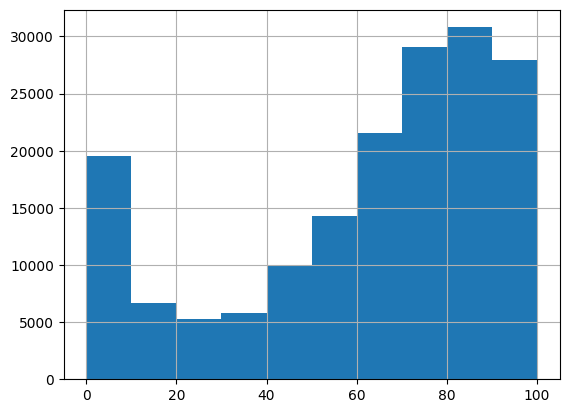

In [47]:
final_df["final_score"].hist()

# EDA

In [64]:
final_df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type', 'date',
       'weight', 'total_clicks', 'module_presentation_length',
       'code_module_encoded', 'code_presentation_encoded', 'gender_encoded',
       'region_encoded', 'highest_education_encoded', 'age_band_encoded',
       'disability_encoded', 'final_result_encoded', 'assessment_type_encoded',
       'final_score'],
      dtype='object')

In [65]:
final_df_cat = final_df[['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type', 'date',
       'weight', 'total_clicks', 'module_presentation_length','final_score']]

final_df_int = final_df[['code_module_encoded', 'code_presentation_encoded', 'id_student', 'gender_encoded', 
        'region_encoded','highest_education_encoded', 'age_band_encoded', 'num_of_prev_attempts',
       'studied_credits', 'disability_encoded', 'final_result_encoded', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type_encoded', 'date',
       'weight', 'total_clicks', 'module_presentation_length','final_score']]

In [66]:
final_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170874 entries, 0 to 170873
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 170874 non-null  object 
 1   code_presentation           170874 non-null  object 
 2   id_student                  170874 non-null  int64  
 3   gender                      170874 non-null  object 
 4   region                      170874 non-null  object 
 5   highest_education           170874 non-null  object 
 6   age_band                    170874 non-null  object 
 7   num_of_prev_attempts        170874 non-null  int64  
 8   studied_credits             170874 non-null  int64  
 9   disability                  170874 non-null  object 
 10  final_result                170874 non-null  object 
 11  id_assessment               170874 non-null  float64
 12  date_submitted              170874 non-null  float64
 13  is_banked     

In [67]:
final_df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170874 entries, 0 to 170873
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module_encoded         170874 non-null  int32  
 1   code_presentation_encoded   170874 non-null  int32  
 2   id_student                  170874 non-null  int64  
 3   gender_encoded              170874 non-null  int32  
 4   region_encoded              170874 non-null  int32  
 5   highest_education_encoded   170874 non-null  int32  
 6   age_band_encoded            170874 non-null  int32  
 7   num_of_prev_attempts        170874 non-null  int64  
 8   studied_credits             170874 non-null  int64  
 9   disability_encoded          170874 non-null  int32  
 10  final_result_encoded        170874 non-null  int32  
 11  id_assessment               170874 non-null  float64
 12  date_submitted              170874 non-null  float64
 13  is_banked     

In [68]:
final_df_cat

,code_module,code_presentation,id_student,gender,region,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,total_clicks,module_presentation_length,final_score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,55<=,0,240,N,Pass,1752.0,18.0,0.0,78.0,TMA,19.0,10.0,934.0,268,82.4
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,55<=,0,240,N,Pass,1753.0,53.0,0.0,85.0,TMA,54.0,20.0,934.0,268,82.4
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,55<=,0,240,N,Pass,1754.0,115.0,0.0,80.0,TMA,117.0,20.0,934.0,268,82.4
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,55<=,0,240,N,Pass,1755.0,164.0,0.0,85.0,TMA,166.0,20.0,934.0,268,82.4
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,55<=,0,240,N,Pass,1756.0,212.0,0.0,82.0,TMA,215.0,30.0,934.0,268,82.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170869,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,35-55,0,30,N,Distinction,37437.0,169.0,0.0,60.0,TMA,173.0,0.0,616.0,269,0.0
170870,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,35-55,0,30,N,Distinction,37438.0,73.0,0.0,100.0,CMA,229.0,0.0,616.0,269,0.0
170871,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,35-55,0,30,N,Distinction,37439.0,150.0,0.0,60.0,CMA,229.0,0.0,616.0,269,0.0
170872,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,35-55,0,30,N,Distinction,37440.0,172.0,0.0,100.0,CMA,229.0,0.0,616.0,269,0.0


##### Course-Level Overview

In [74]:
# Count unique courses
course_counts = final_df_cat.groupby(['code_module', 'code_presentation']).size().reset_index(name='count')
print("\nNumber of unique courses:", len(course_counts))
print("\nCourses and their details:")
print(course_counts)


Number of unique courses: 22

Courses and their details:
   code_module code_presentation  count
0          AAA             2013J   1631
1          AAA             2014J   1515
2          BBB             2013B  11240
3          BBB             2013J  14365
4          BBB             2014B   9976
5          BBB             2014J   7398
6          CCC             2014B   6737
7          CCC             2014J  10277
8          DDD             2013B  10355
9          DDD             2013J   7928
10         DDD             2014B   4531
11         DDD             2014J   7051
12         EEE             2013J   2881
13         EEE             2014B   1778
14         EEE             2014J   3227
15         FFF             2013B  12181
16         FFF             2013J  16228
17         FFF             2014B  10185
18         FFF             2014J  16175
19         GGG             2013J   5949
20         GGG             2014B   4895
21         GGG             2014J   4371


In [75]:
# Count assessments per course
assessment_counts = final_df_cat.groupby(['code_module', 'code_presentation'])['id_assessment'].nunique().reset_index()
print("\nNumber of assessments per course:")
print(assessment_counts)


Number of assessments per course:
   code_module code_presentation  id_assessment
0          AAA             2013J              5
1          AAA             2014J              5
2          BBB             2013B             11
3          BBB             2013J             11
4          BBB             2014B             11
5          BBB             2014J              5
6          CCC             2014B              8
7          CCC             2014J              8
8          DDD             2013B             14
9          DDD             2013J              7
10         DDD             2014B              7
11         DDD             2014J              6
12         EEE             2013J              4
13         EEE             2014B              4
14         EEE             2014J              4
15         FFF             2013B             12
16         FFF             2013J             12
17         FFF             2014B             12
18         FFF             2014J             12
19   

In [76]:
# Count students per course
student_counts = final_df_cat.groupby(['code_module', 'code_presentation'])['id_student'].nunique().reset_index()
print("\nNumber of students per course:")
print(student_counts)


Number of students per course:
   code_module code_presentation  id_student
0          AAA             2013J         364
1          AAA             2014J         340
2          BBB             2013B        1366
3          BBB             2013J        1710
4          BBB             2014B        1204
5          BBB             2014J        1792
6          CCC             2014B        1414
7          CCC             2014J        1998
8          DDD             2013B        1064
9          DDD             2013J        1505
10         DDD             2014B         944
11         DDD             2014J        1426
12         EEE             2013J         827
13         EEE             2014B         536
14         EEE             2014J         934
15         FFF             2013B        1367
16         FFF             2013J        1872
17         FFF             2014B        1205
18         FFF             2014J        1842
19         GGG             2013J         818
20         GGG         

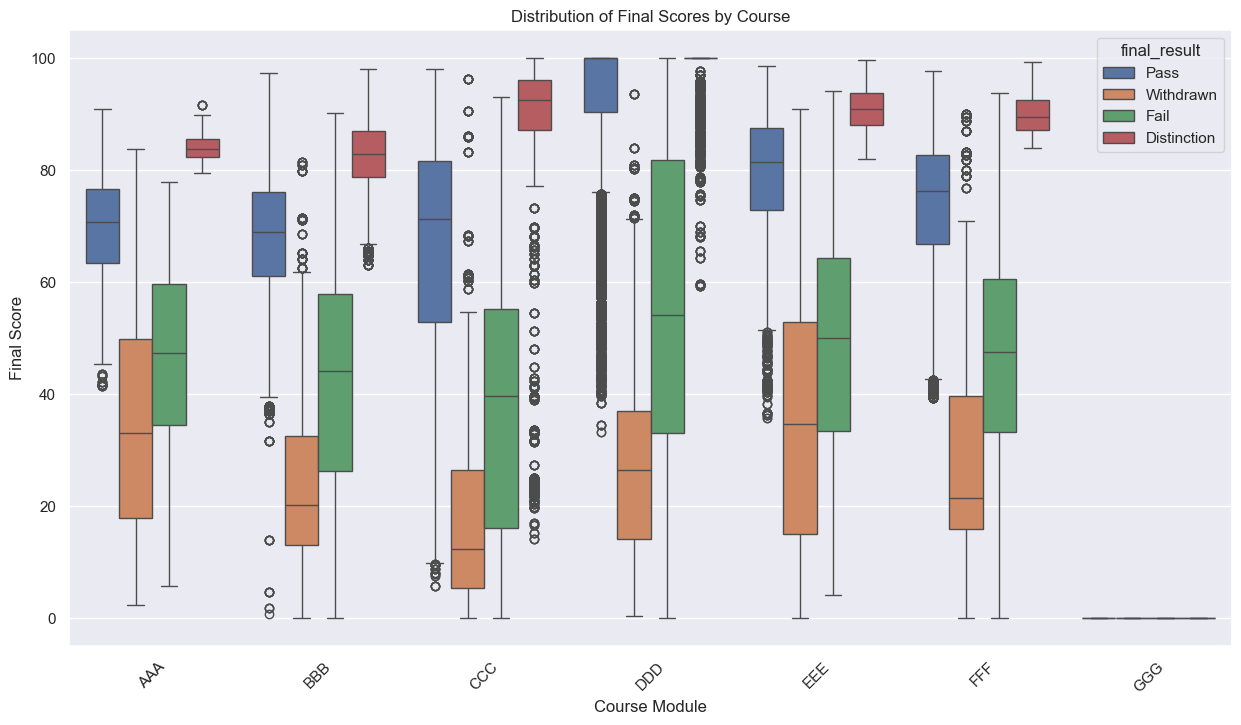

In [77]:
# Plot final score distributions per course
plt.figure(figsize=(15, 8))
sns.boxplot(data=final_df_cat, x='code_module', y='final_score', hue='final_result')
plt.title('Distribution of Final Scores by Course')
plt.xlabel('Course Module')
plt.ylabel('Final Score')
plt.xticks(rotation=45)
plt.show()

In [78]:
result_counts = final_df_cat.groupby(['code_module', 'code_presentation', 'final_result']).size().unstack(fill_value=0)
print("\nFinal result counts per course:")
print(result_counts)


Final result counts per course:
final_result                   Distinction  Fail   Pass  Withdrawn
code_module code_presentation                                     
AAA         2013J                      100   154   1281         96
            2014J                      120   137   1136        122
BBB         2013B                     1673  2073   6689        805
            2013J                     1912  2457   9274        722
            2014B                     1782  1911   5748        535
            2014J                      900  1056   4833        609
CCC         2014B                     1330  1158   3196       1053
            2014J                     2164  1741   4889       1483
DDD         2013B                      743  2400   6033       1179
            2013J                      671  1514   4905        838
            2014B                      811   720   2377        623
            2014J                      666  1515   3991        879
EEE         2013J            

##### Corrlation

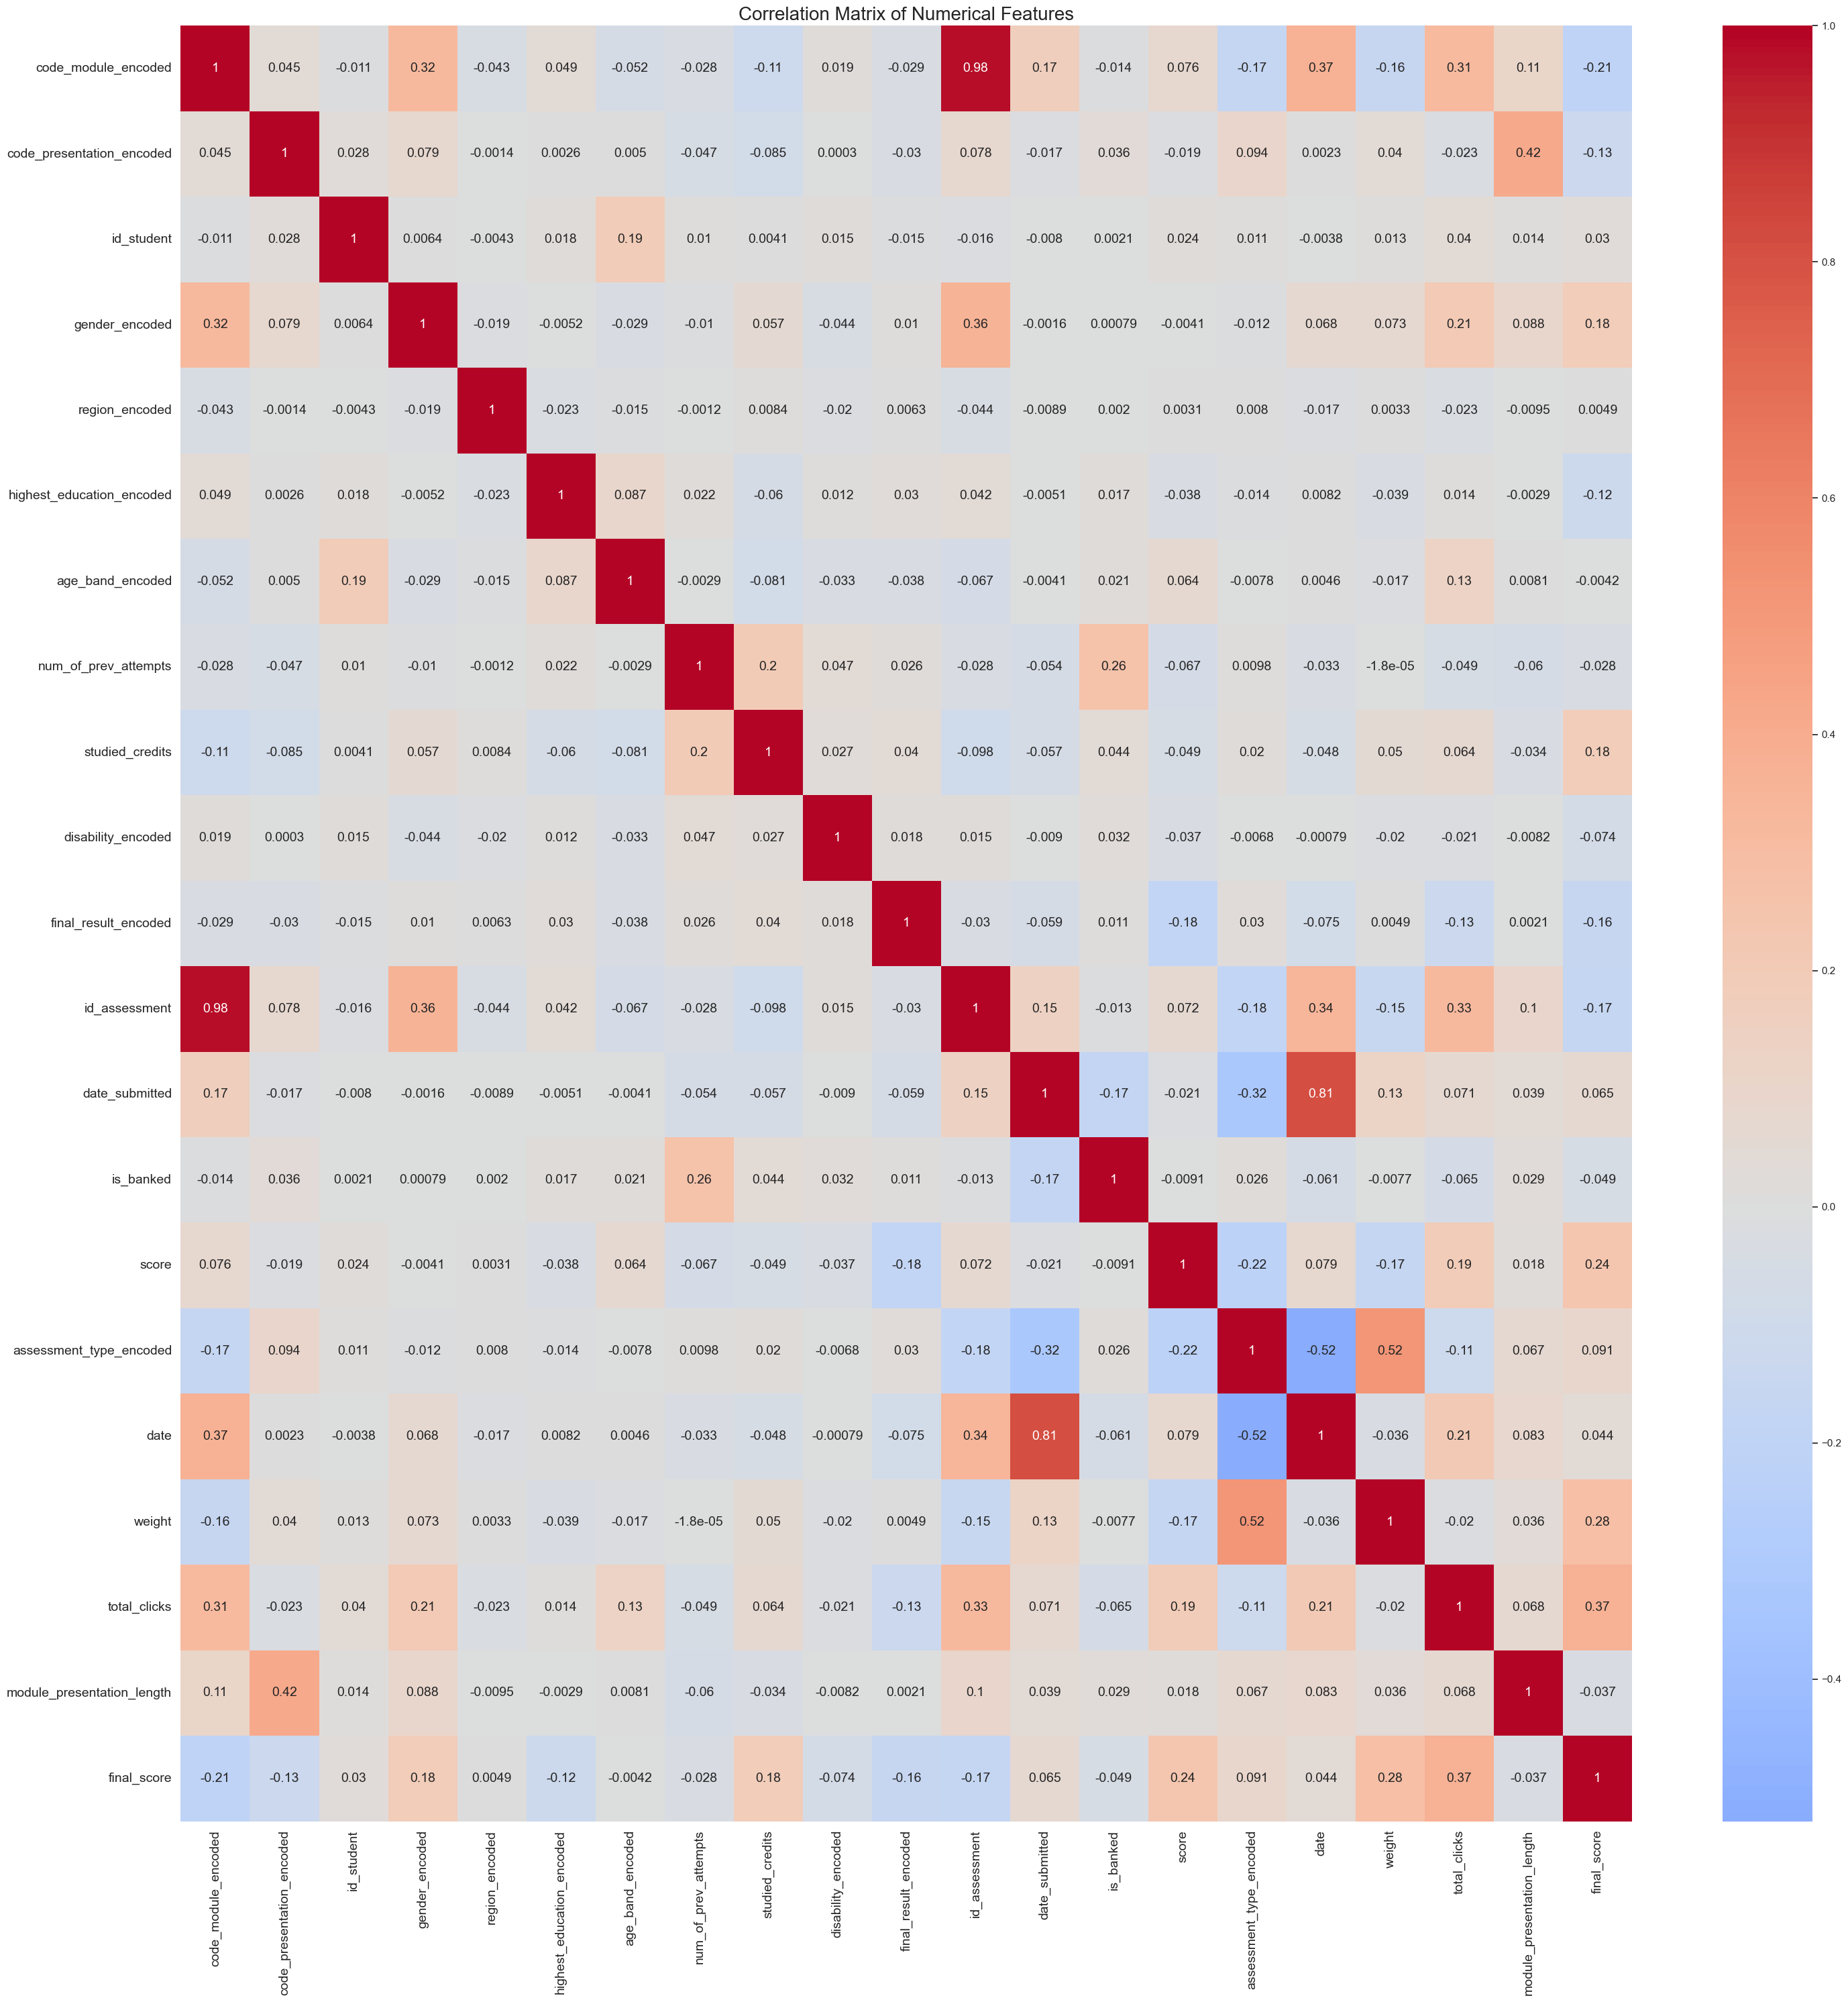

In [82]:
# Calculate correlation matrix
correlation_matrix = final_df_int.corr()

# Create a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={'size': 14})
plt.title('Correlation Matrix of Numerical Features', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

# Visualization

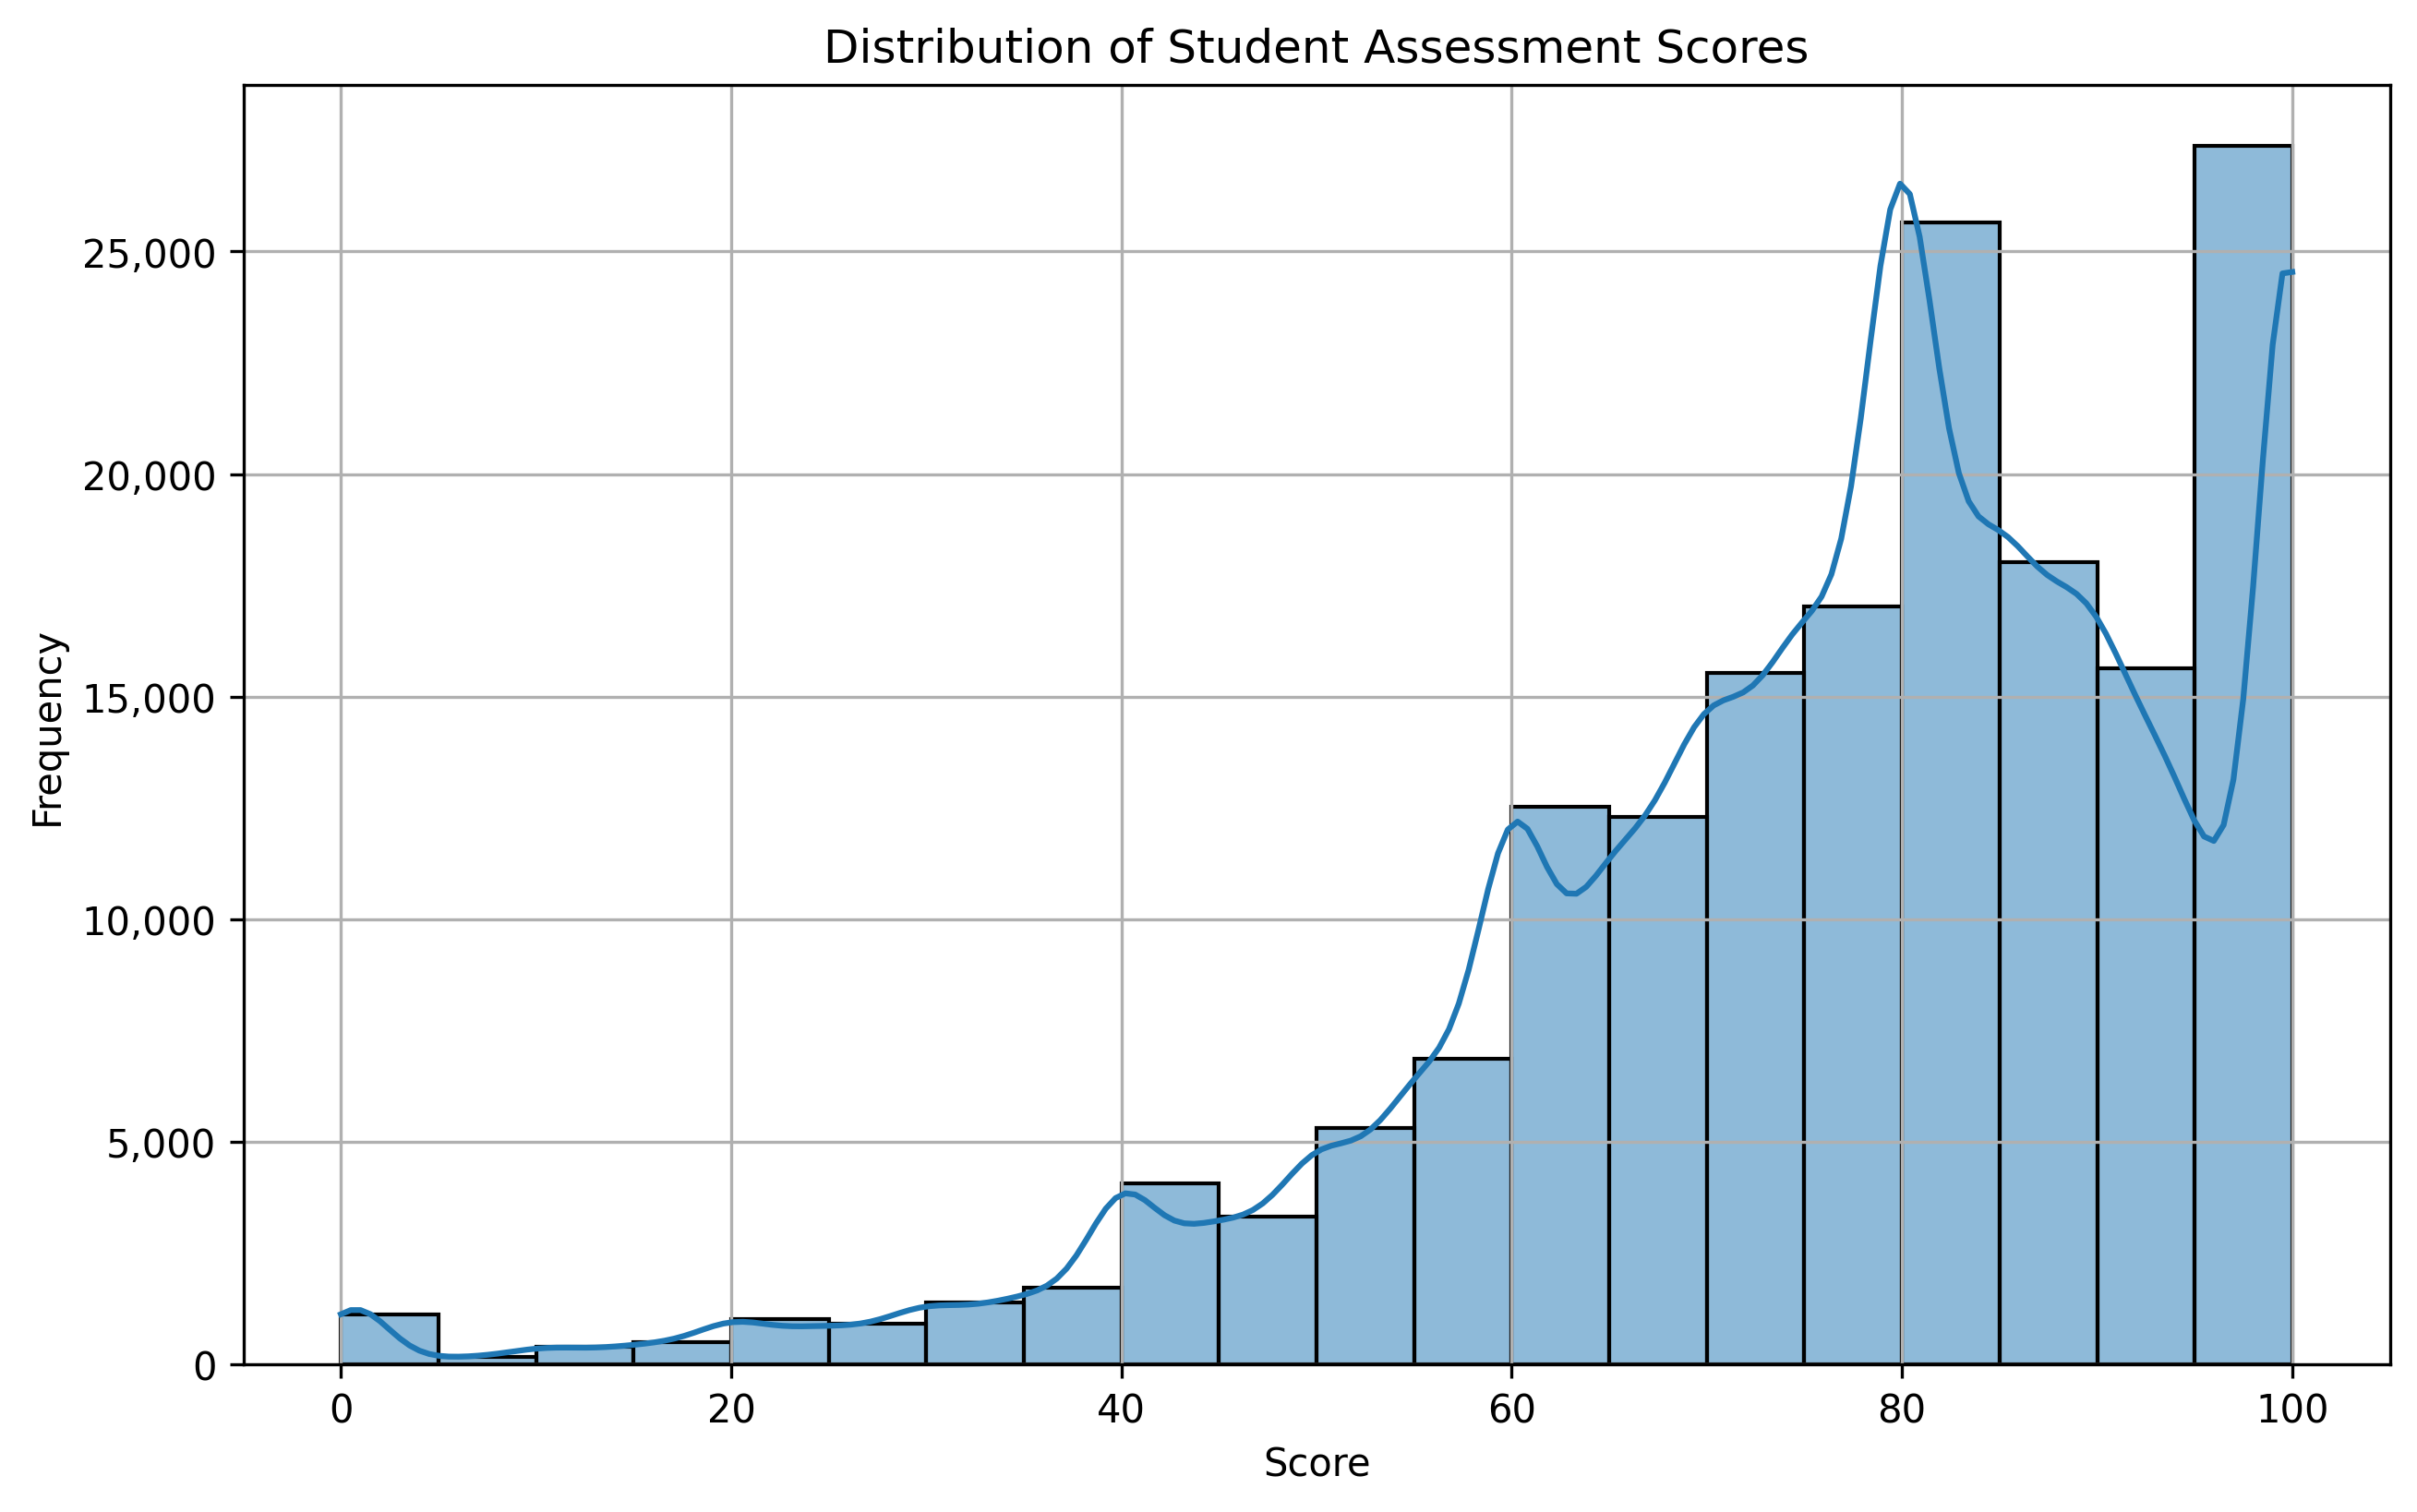

In [58]:
plt.figure(figsize=(10, 6), dpi=300)
sns.histplot(final_df_cat['score'], bins=20, kde=True)

plt.title('Distribution of Student Assessment Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Formatting the y-axis with commas for thousands
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

plt.grid(True)
plt.show()

C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=final_df_cat, palette=colors)
C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=column, data=final_df_cat, palette=colors)


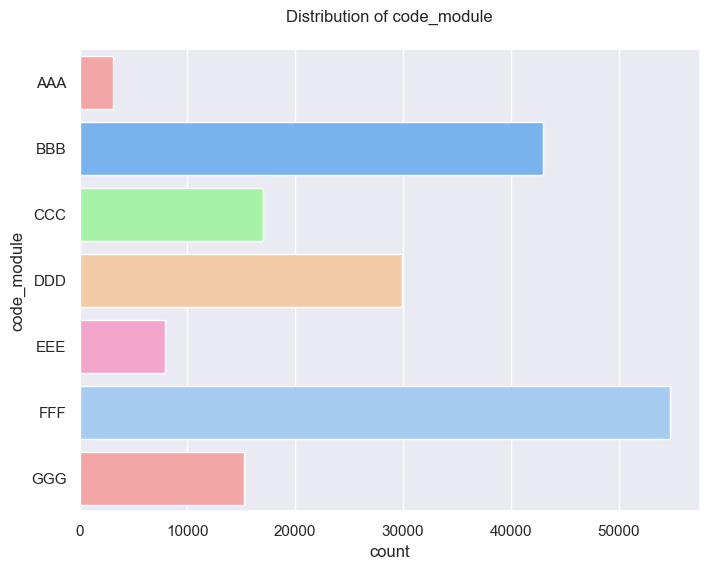

C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=final_df_cat, palette=colors)
C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(y=column, data=final_df_cat, palette=colors)


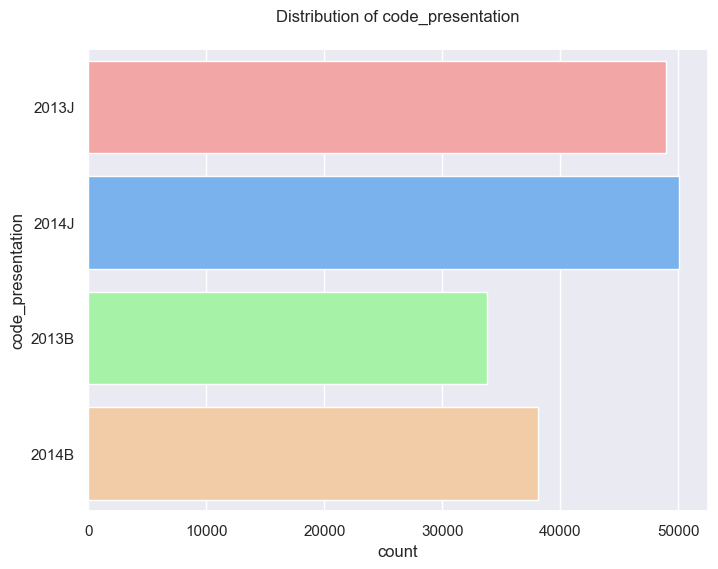

C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=final_df_cat, palette=colors)
C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(y=column, data=final_df_cat, palette=colors)


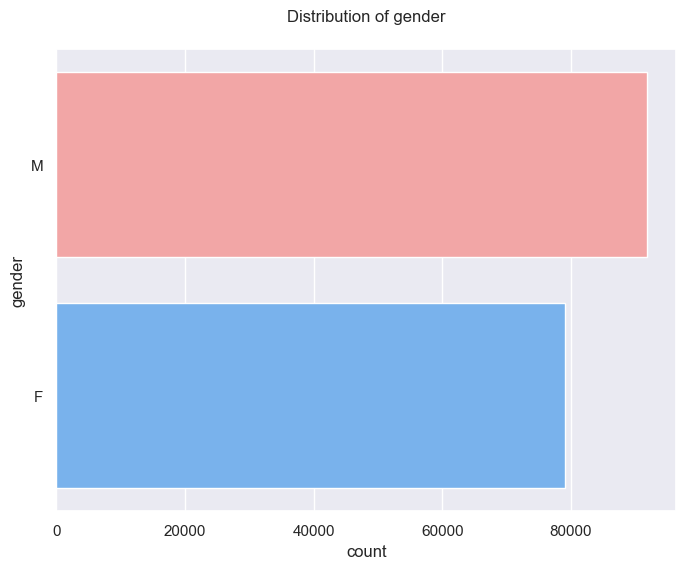

C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=final_df_cat, palette=colors)
C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: UserWarning: 
The palette list has fewer values (6) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=column, data=final_df_cat, palette=colors)


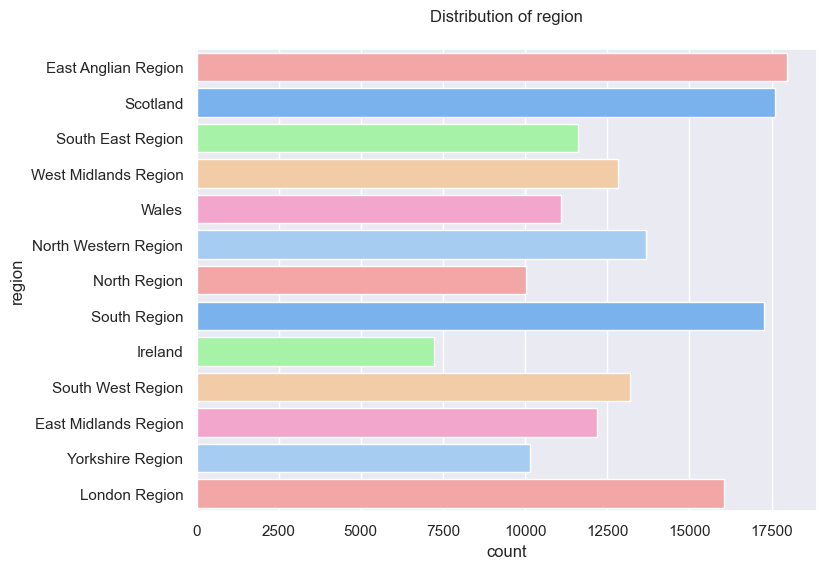

C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=final_df_cat, palette=colors)
C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(y=column, data=final_df_cat, palette=colors)


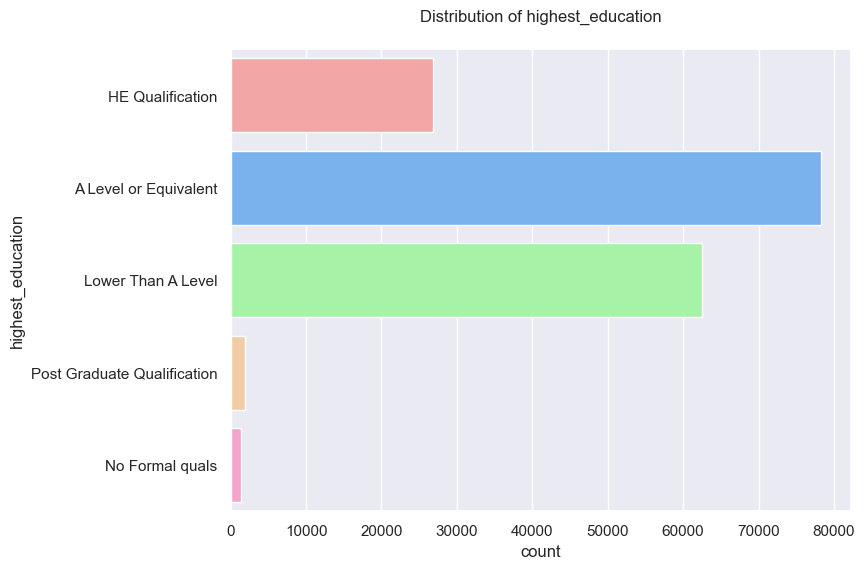

C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=final_df_cat, palette=colors)
C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(y=column, data=final_df_cat, palette=colors)


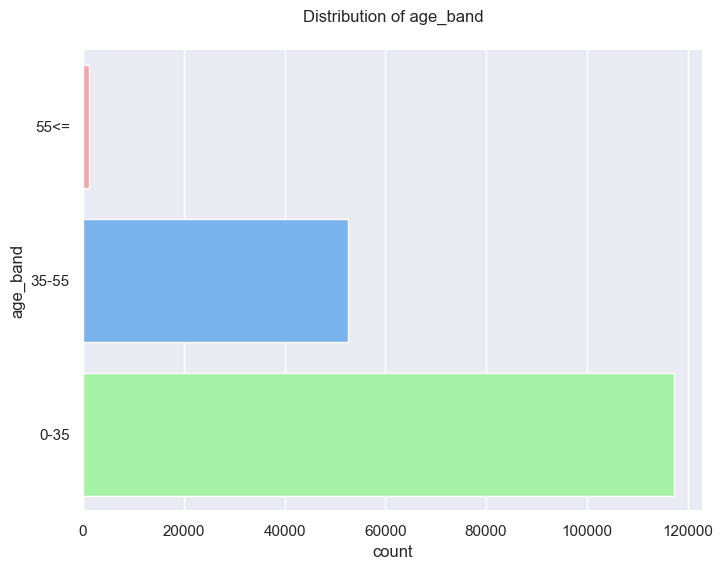

C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=final_df_cat, palette=colors)
C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(y=column, data=final_df_cat, palette=colors)


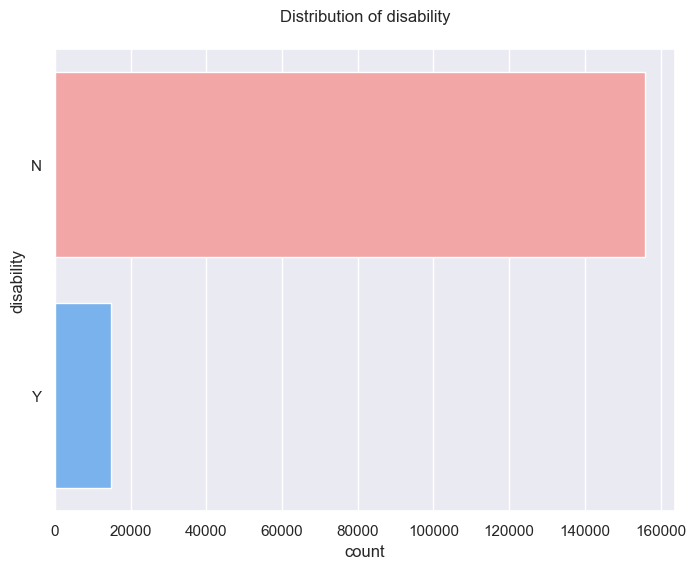

C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=final_df_cat, palette=colors)
C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(y=column, data=final_df_cat, palette=colors)


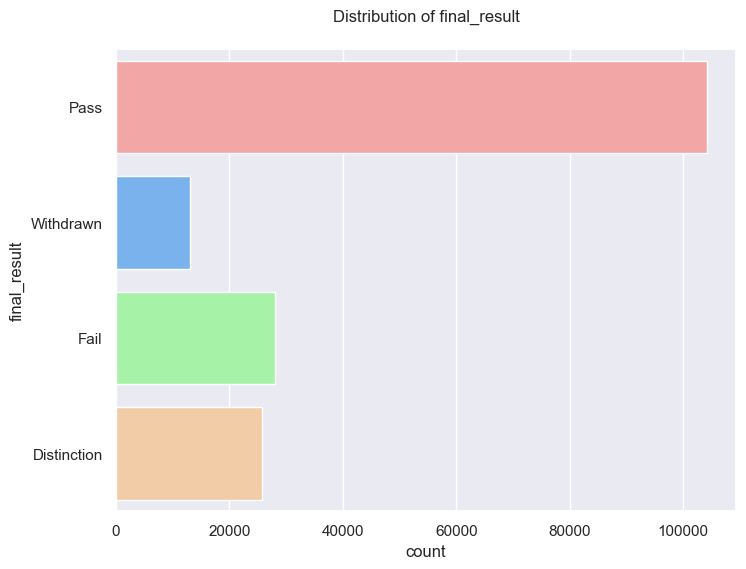

C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=final_df_cat, palette=colors)
C:\Users\norae\AppData\Local\Temp\ipykernel_11572\3921608047.py:7: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(y=column, data=final_df_cat, palette=colors)


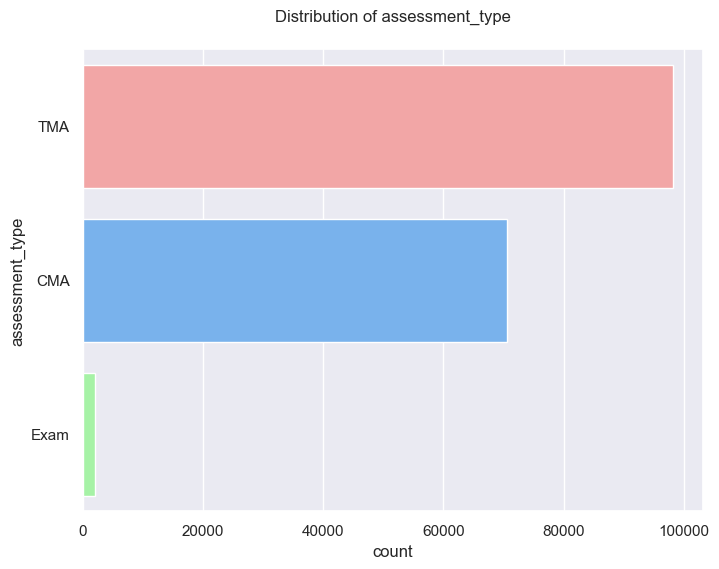

In [62]:
sns.set_theme(style="darkgrid")
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF']
object_columns = final_df_cat.select_dtypes(include=['object']).columns
for column in object_columns:
    try:
        plt.figure(figsize=(8,6))
        sns.countplot(y=column, data=final_df_cat, palette=colors)
        plt.title(f'Distribution of {column}', pad=20)
        plt.show()
    except Exception as e:
        print(f"Skipping plot for {column} due to error: {str(e)}")
        continue

C:\Users\norae\AppData\Local\Temp\ipykernel_11572\2093500553.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_reset, x='code_module', y=df_reset.columns[-1], hue='assessment_type', ci=None)


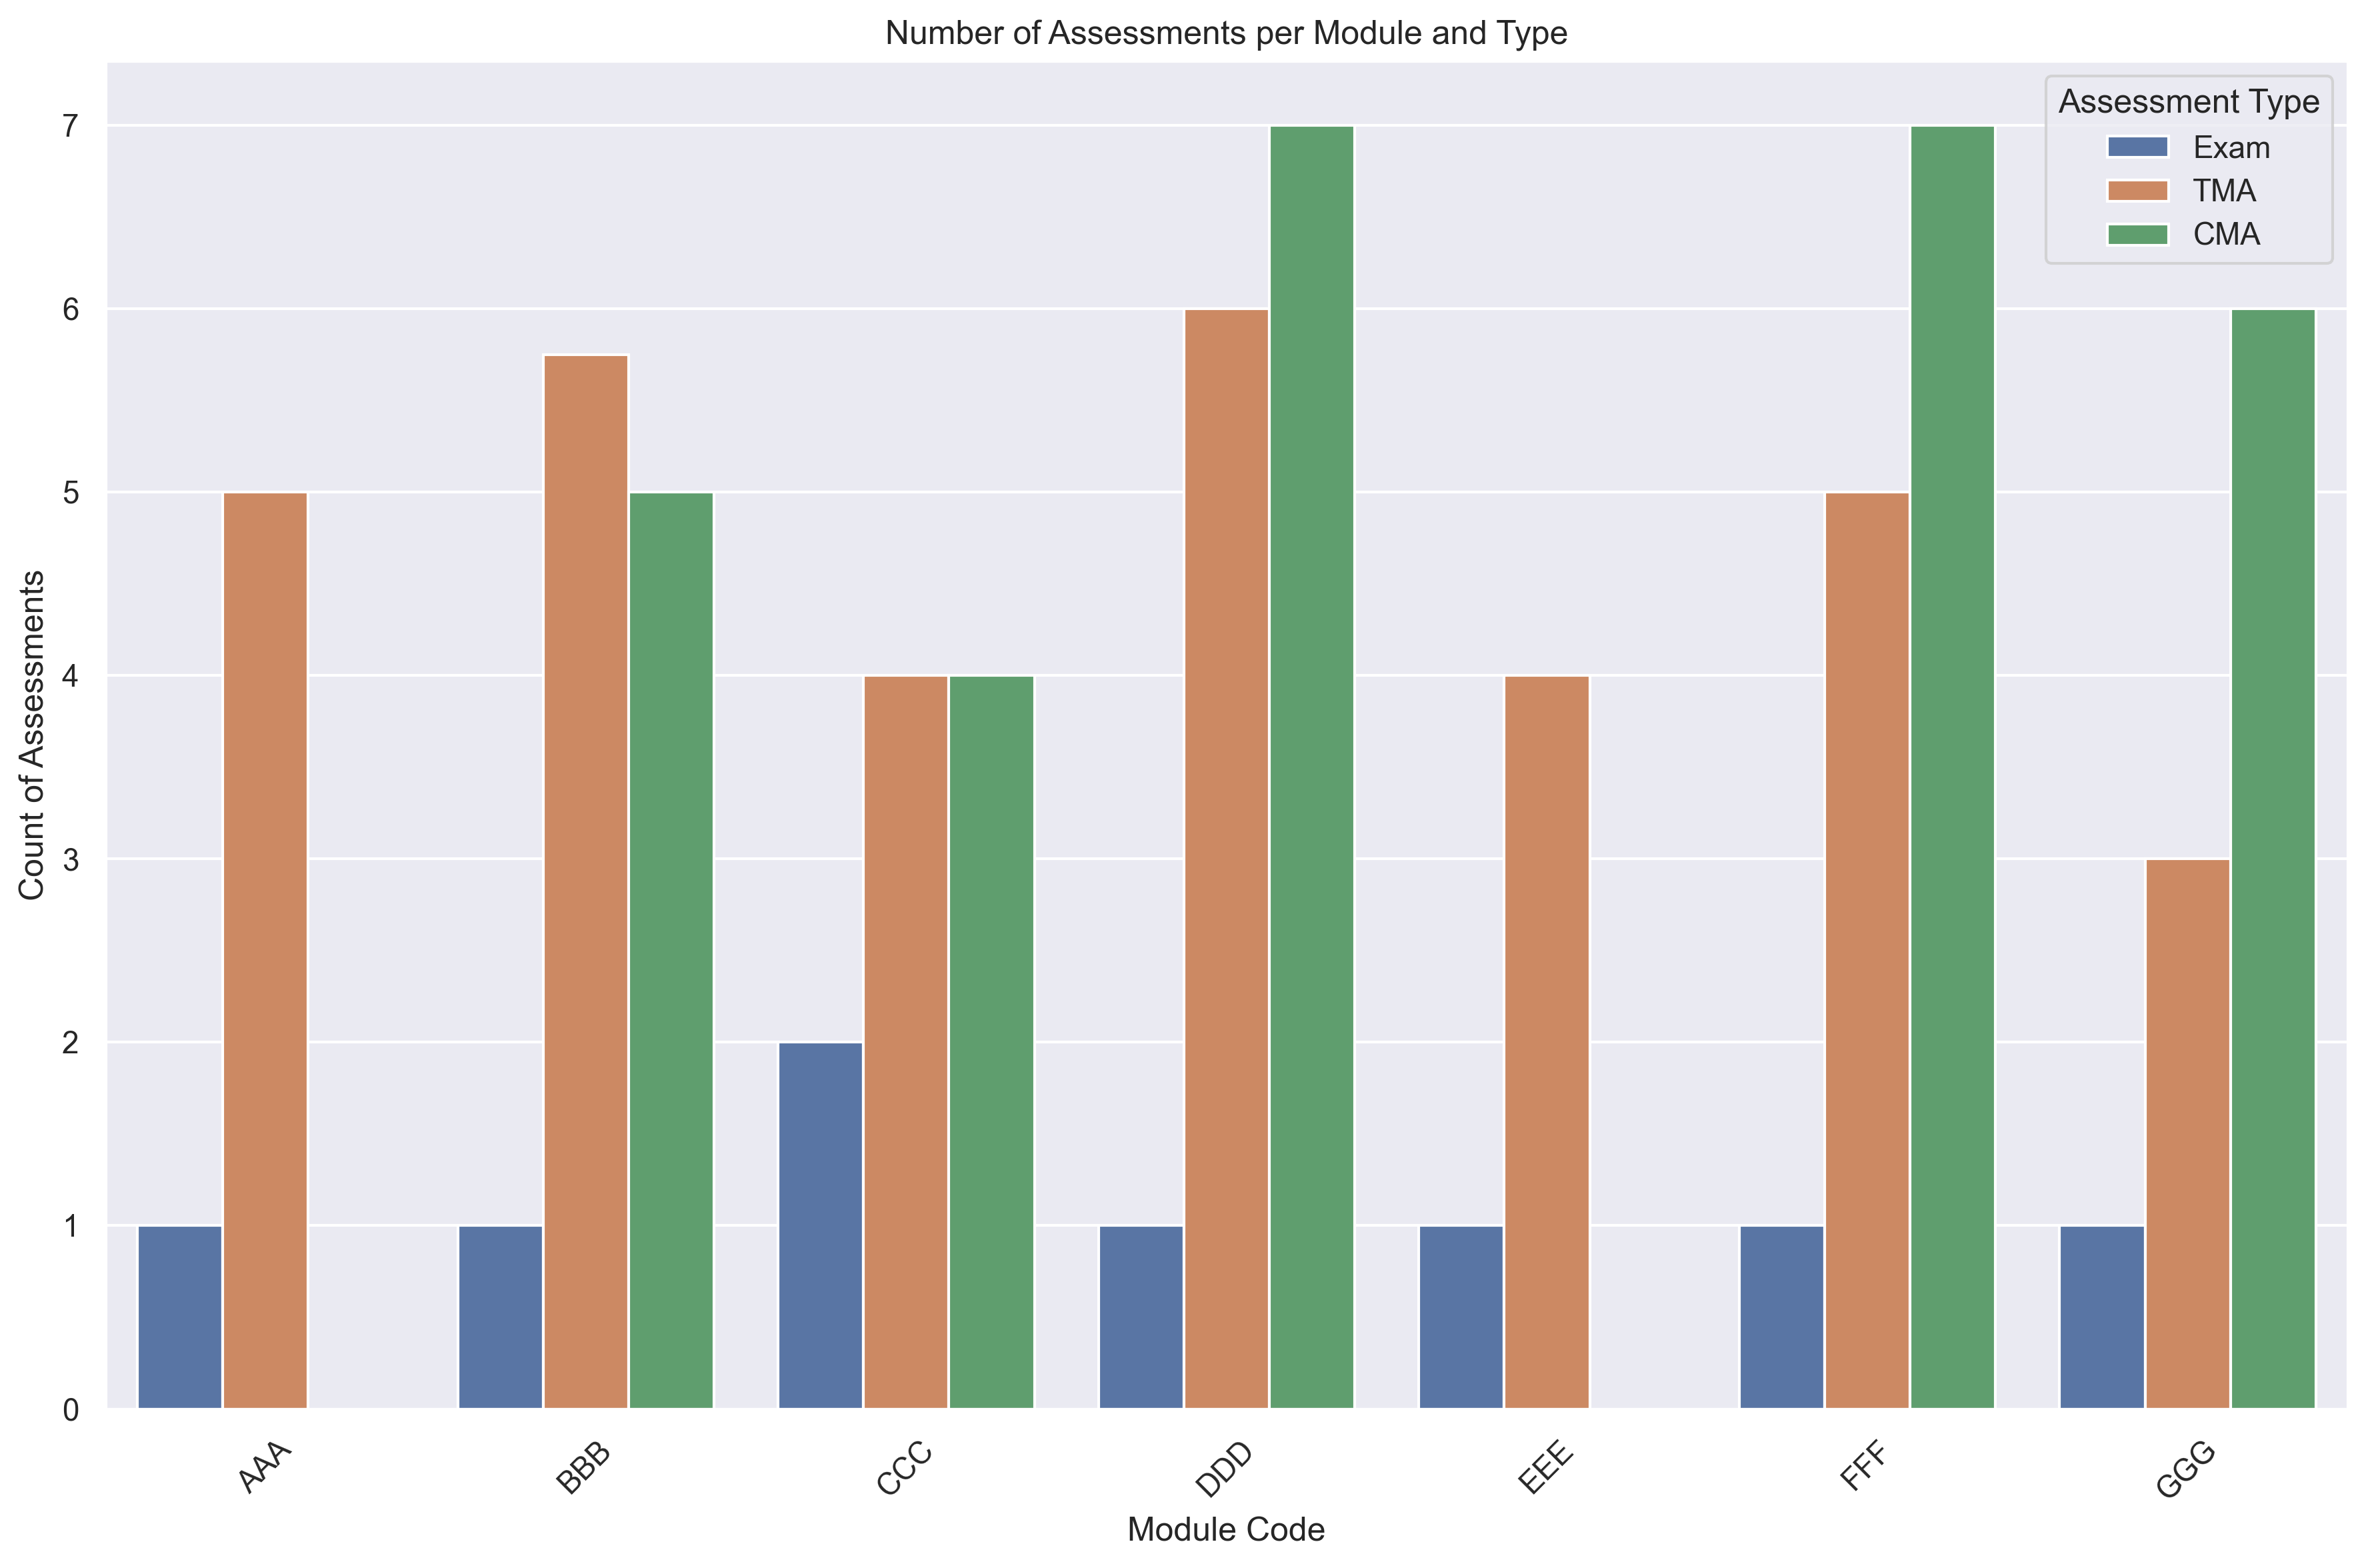

In [63]:
df = assessments_df
df = df.drop(['date','weight'], axis=1).groupby(['code_module','assessment_type','code_presentation']).count()

df_reset = df.reset_index()
plt.figure(figsize=(12, 8), dpi=300)
sns.barplot(data=df_reset, x='code_module', y=df_reset.columns[-1], hue='assessment_type', ci=None)
plt.title('Number of Assessments per Module and Type')
plt.xlabel('Module Code')
plt.ylabel('Count of Assessments')
plt.xticks(rotation=45)
plt.legend(title='Assessment Type')
plt.tight_layout()

# Show the plot
plt.show()

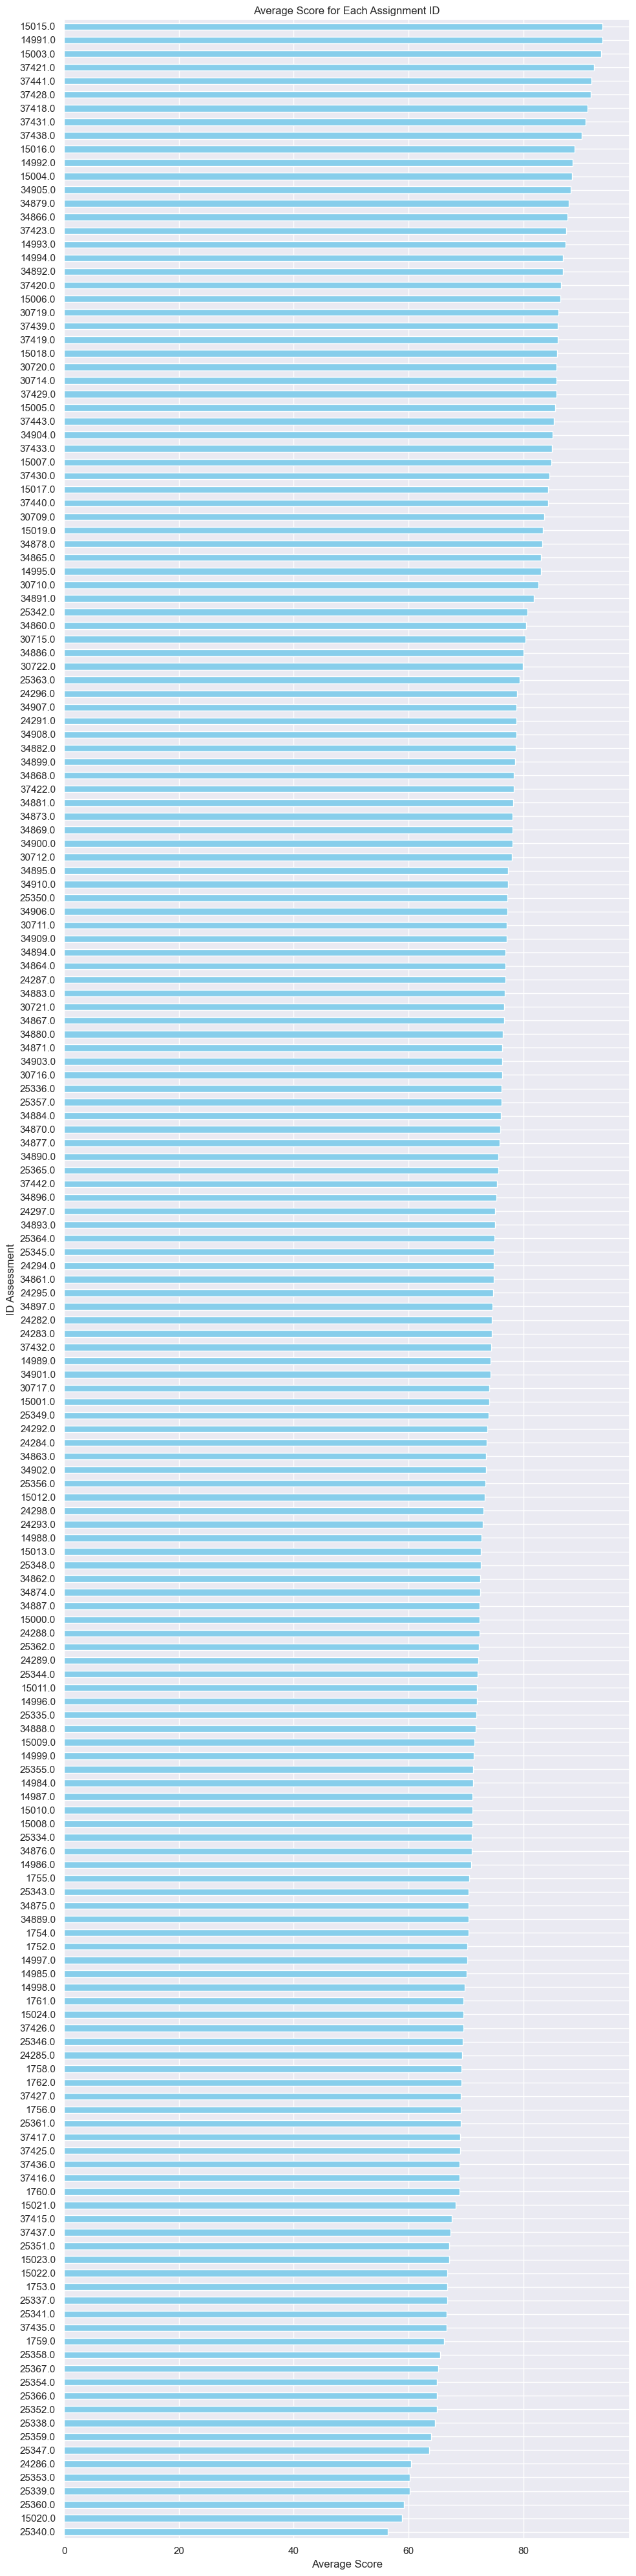

In [85]:
average_scores = final_df_cat.groupby('id_assessment')['score'].mean()
average_scores_sorted = average_scores.sort_values()

# Plotting the average scores
plt.figure(figsize=(10, 40)) 
average_scores_sorted.plot(kind='barh', color='skyblue')
plt.xlabel('Average Score')
plt.ylabel('ID Assessment')
plt.title('Average Score for Each Assignment ID')
plt.tight_layout() 
plt.show()

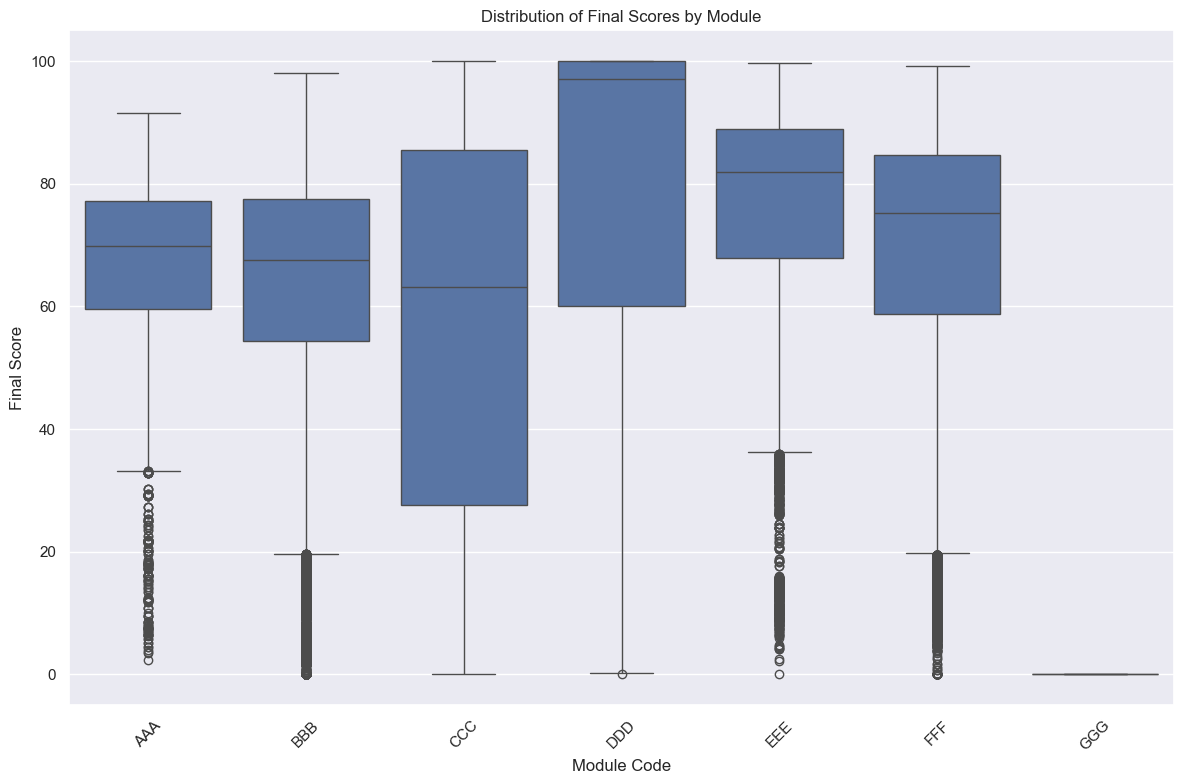

In [86]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=final_df_cat, x='code_module', y='final_score')
plt.title('Distribution of Final Scores by Module')
plt.xlabel('Module Code')
plt.ylabel('Final Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

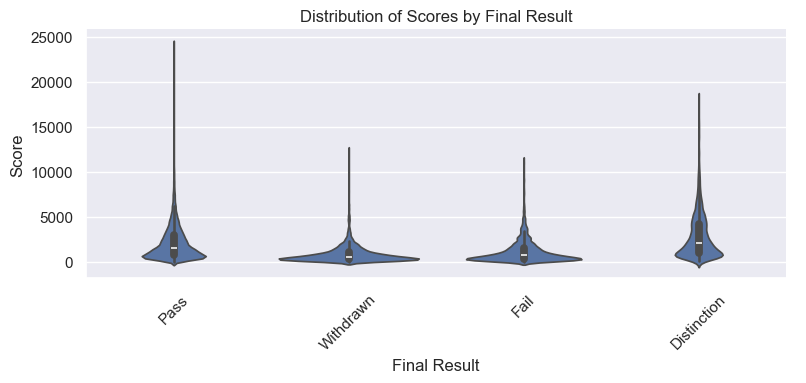

In [89]:
sns.catplot(x='final_result', y='total_clicks', kind='violin', data=final_df_cat, height=4, aspect=2)
plt.title('Distribution of Scores by Final Result')
plt.xlabel('Final Result')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

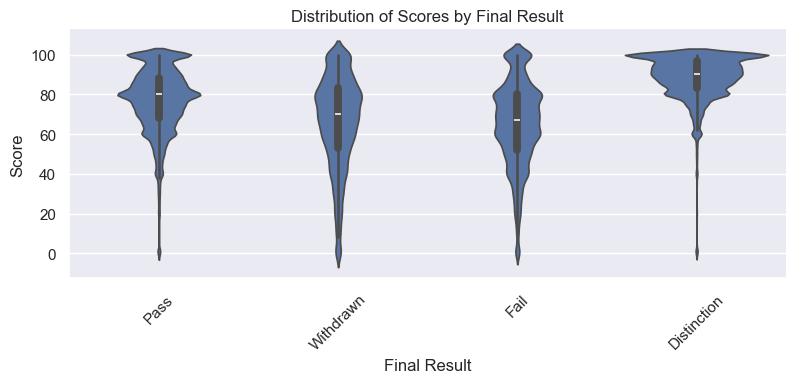

In [90]:
sns.catplot(x='final_result', y='score', kind='violin', data=final_df_cat, height=4, aspect=2)
plt.title('Distribution of Scores by Final Result')
plt.xlabel('Final Result')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Engineering

# models (ML AND Deep)